# Spotify - Top Hits Spotify from 2000-2019

[Dataset link](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019)

This is a collection of data taken from the popular music streaming platform Spotify. 

Let's explore data and find out all the information that we can using pandas and matplotlib.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [5]:
# df = pd.read_csv("../Risorse/dataset/top_hits_spotify_2000-2019.csv")
df = pd.read_csv("https://raw.githubusercontent.com/pg-88/ARTIFICIAL-INTELLIGENCE-MACHINE-LEARNING/refs/heads/main/Risorse/dataset/top_hits_spotify_2000-2019.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


## Checking data missing / null value

Before we start doing anything let's check the data. I want to know if there are any missing value any duplicate row, and if the type of every row is compatible with the data that should be represented.

### Null value

In [8]:
df.isnull().sum()
df.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

### duplicated value

`dataframe.duplicated()` This method allow to discorver duplicate row, 

In [ ]:

df.duplicated().value_counts()
df.duplicated().sum()


59

There are duplicated, let see the lines

In [16]:

df[df.duplicated(subset="artist")]
df[df.duplicated(subset="artist", keep='last')]


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.1190,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,Ed Sheeran,Take Me Back to London (feat. Stormzy),189733,True,2019,66,0.885,0.762,8,-5.513,0,0.2160,0.2190,0.000000,0.1620,0.605,138.058,pop
1972,Jonas Brothers,Only Human,183000,False,2019,71,0.795,0.496,0,-5.883,1,0.0722,0.1080,0.000000,0.0645,0.874,94.010,pop
1984,Post Malone,Better Now,231266,True,2018,80,0.680,0.578,10,-5.804,1,0.0400,0.3310,0.000000,0.1350,0.341,145.038,hip hop
1990,Sam Smith,How Do You Sleep?,202204,False,2019,73,0.477,0.682,1,-4.931,0,0.0925,0.1530,0.000000,0.0763,0.345,110.567,pop


Once we're sure that values are really discardable, we can use the method `dataFrame.drop_duplicates()`


In [17]:
# using drop selecting the rows 


# Using drop_duplicates 

**Notice** the index in the dataframe, how has changed after the drop?

### Looking into the data 

First thing to do now that our dataset is clean, is to understand how the dataframe is structured

In [18]:
# shape
# numbers of rows and columns
df.shape


(2000, 18)

In [19]:
# describe
# statistical data
# df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,2000.0,228748.124500,39136.569008,113000.000000,203580.00000,223279.50000,248133.000000,484146.000
year,2000.0,2009.494000,5.859960,1998.000000,2004.00000,2010.00000,2015.000000,2020.000
popularity,2000.0,59.872500,21.335577,0.000000,56.00000,65.50000,73.000000,89.000
danceability,2000.0,0.667438,0.140416,0.129000,0.58100,0.67600,0.764000,0.975
energy,2000.0,0.720366,0.152745,0.054900,0.62200,0.73600,0.839000,0.999
key,2000.0,5.378000,3.615059,0.000000,2.00000,6.00000,8.000000,11.000
loudness,2000.0,-5.512434,1.933482,-20.514000,-6.49025,-5.28500,-4.167750,-0.276
mode,2000.0,0.553500,0.497254,0.000000,0.00000,1.00000,1.000000,1.000
speechiness,2000.0,0.103568,0.096159,0.023200,0.03960,0.05985,0.129000,0.576
acousticness,2000.0,0.128955,0.173346,0.000019,0.01400,0.05570,0.176250,0.976


### How about genere?

If we want to see data related to musical genere, it's important to make digestible the data to pandas, as a string ("pop", "rock", etc...) it doesn't mean anything.
On the other hand we may want to add a clear label for the column key and mode as to make more human readable the data.

Using `get_dummies` for the genere: 

Using `dataFrame.transform()` allow us to apply a function to all the element of a Series to change the values of the data

In [ ]:
    
def scalar_to_key(int_key):
    if int_key == 0:
        return "C"
    elif int_key == 1:
        return "C#"
    elif int_key == 2:
        return "D"  
    elif int_key == 3:
        return "D#"
    elif int_key == 4:
        return "E"
    elif int_key == 5:
        return "F"
    elif int_key == 6:
        return "F#"
    elif int_key == 7:
        return "G"
    elif int_key == 8:
        return "G#"
    elif int_key == 9:
        return "A"
    elif int_key == 10:
        return "A#"
    elif int_key == 11:
        return "B"
    


df["key_str"] = df["key"].transform(scalar_to_key)
df


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,mode_str,key_str
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,Minor,C#
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",Major,C
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",Major,G
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",Minor,C
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,Minor,G#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,Minor,C#
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,Major,A
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",Major,A
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,Major,G#


In [ ]:
def scalar_to_mode(int_mode):
    pass


df["mode_str"] = df["mode"].transform(scalar_to_mode)

In [ ]:
# Could be useful also for searching a dataframe
# df[df["artist"].transform(lambda x: x.upper()) == "BLINK-182"]

## Data visualization

Plotting graphs directly with pandas

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58],
 [Text(0, 0, 'pop'),
  Text(1, 0, 'hip hop, pop'),
  Text(2, 0, 'hip hop, pop, R&B'),
  Text(3, 0, 'pop, Dance/Electronic'),
  Text(4, 0, 'pop, R&B'),
  Text(5, 0, 'hip hop'),
  Text(6, 0, 'hip hop, pop, Dance/Electronic'),
  Text(7, 0, 'rock'),
  Text(8, 0, 'rock, pop'),
  Text(9, 0, 'Dance/Electronic'),
  Text(10, 0, 'rock, metal'),
  Text(11, 0, 'pop, latin'),
  Text(12, 0, 'pop, rock'),
  Text(13, 0, 'set()'),
  Text(14, 0, 'hip hop, Dance/Electronic'),
  Text(15, 0, 'latin'),
  Text(16, 0, 'pop, rock, metal'),
  Text(17, 0, 'hip hop, pop, latin'),
  Text(18, 0, 'R&B'),
  Text(19, 0, 'pop, rock, Dance/Electronic'),
  Text(20, 0, 'country'),
  

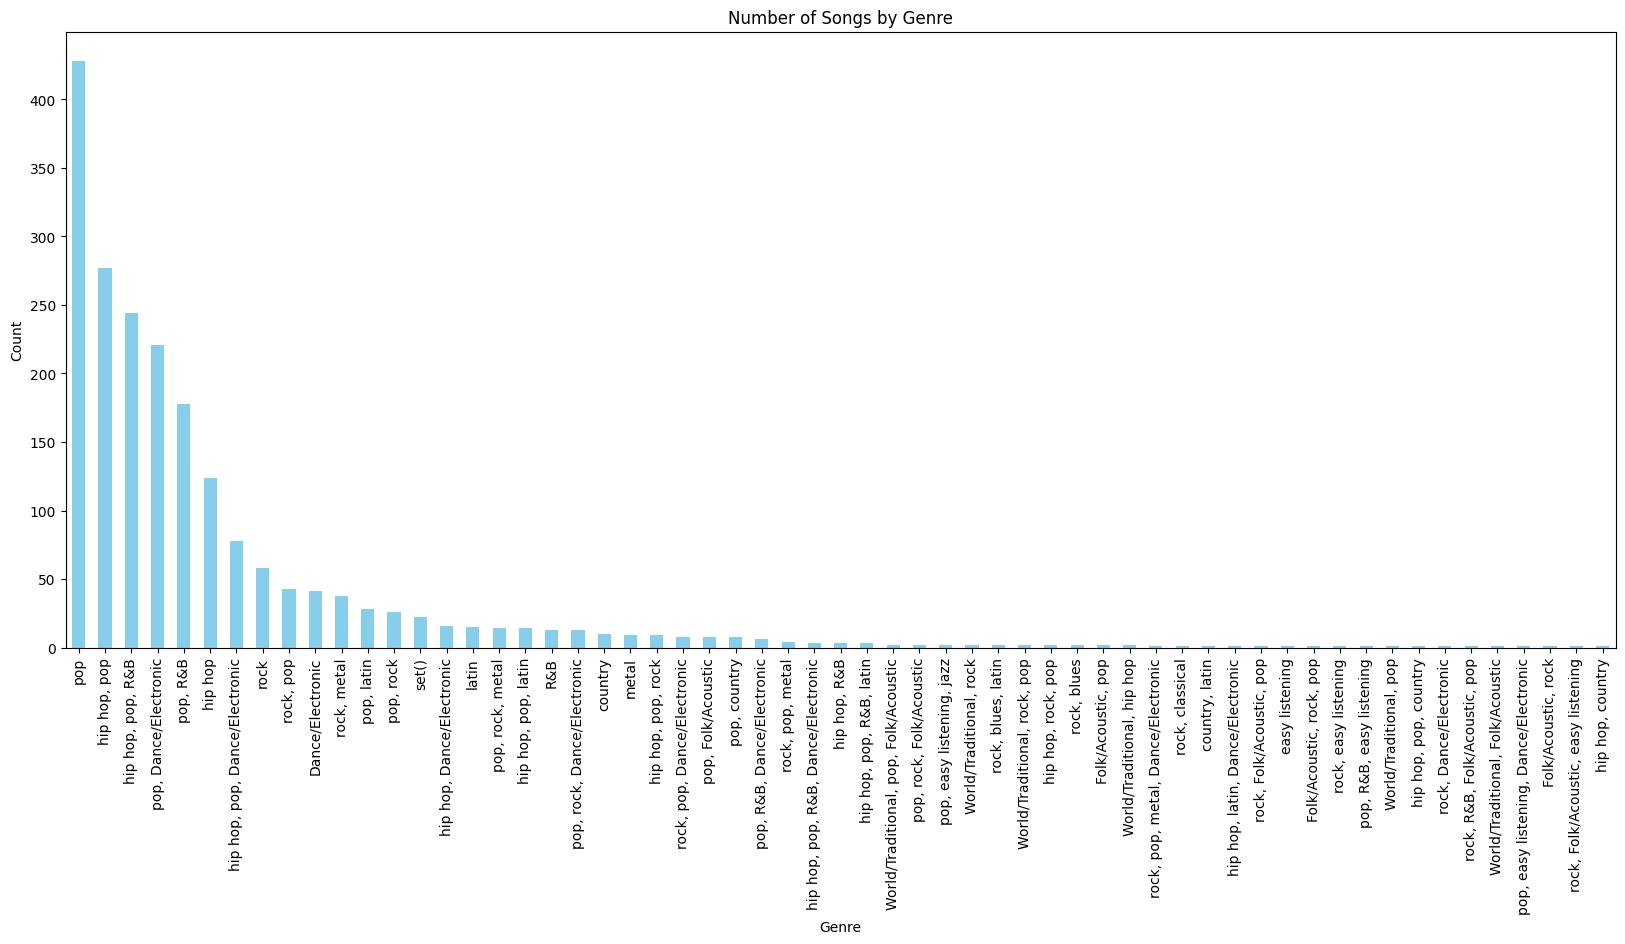

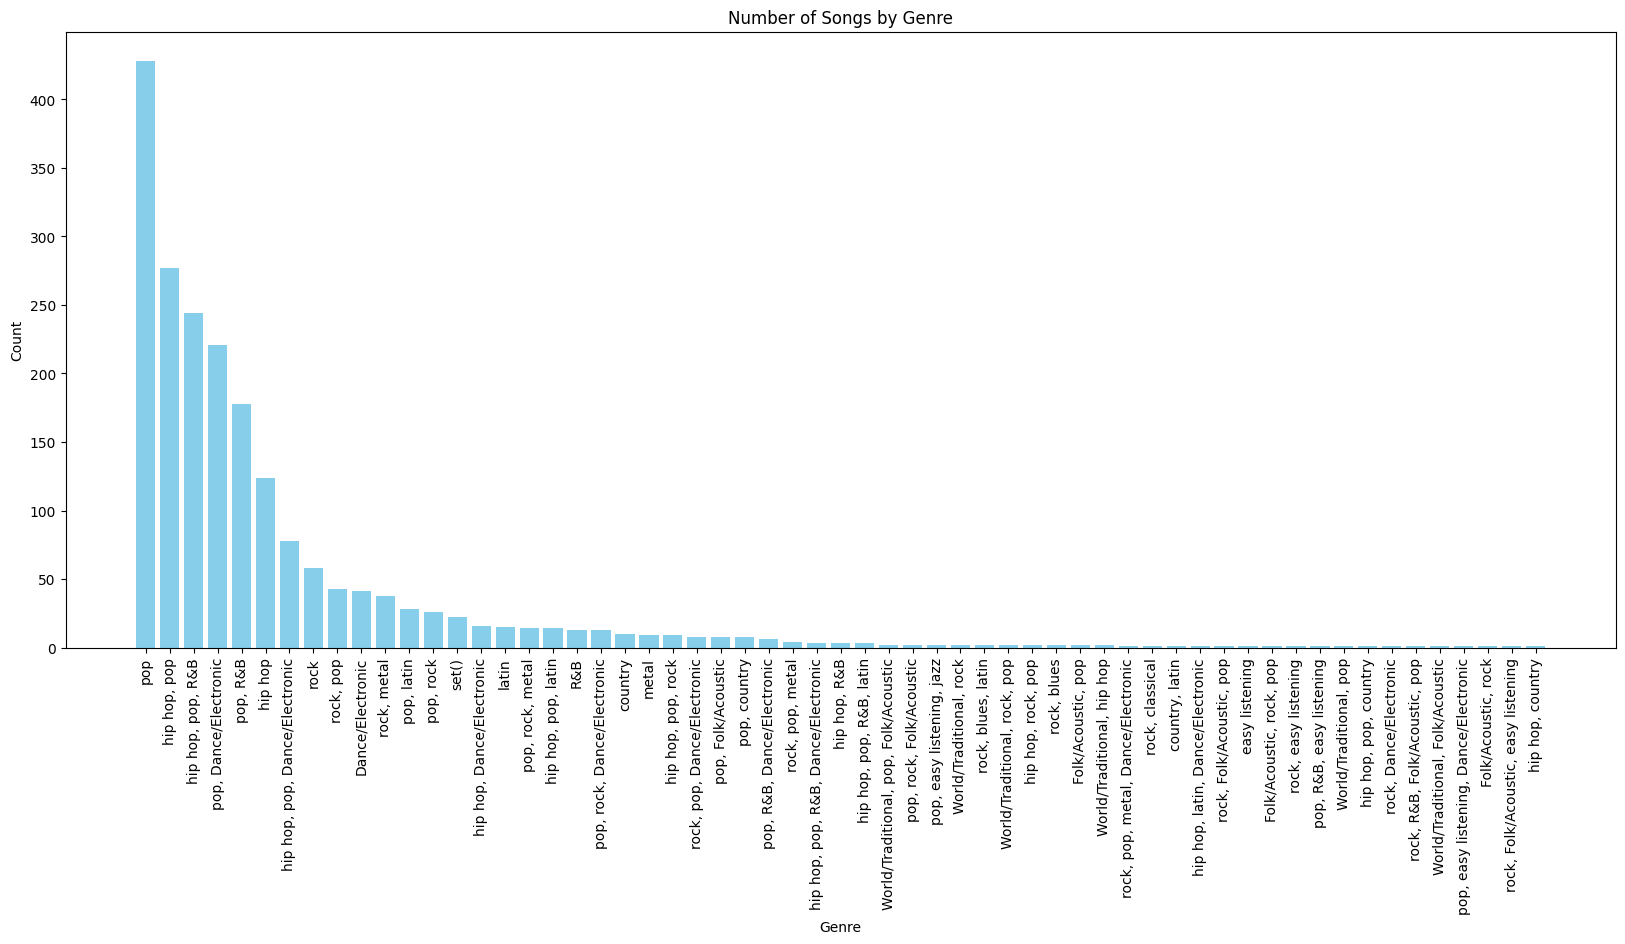

In [ ]:

genre = df["genre"].value_counts()
plt.figure(figsize=(20,8))
genre.plot(kind='bar', figsize=(20,8), color="skyblue")
plt.title('Number of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
# plt.xticks(rotation=90)  # Rotate x labels for better readability

plt.figure(figsize=(20,8))

plt.bar(genre.index, genre.values, color="skyblue")
plt.title('Number of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x labels for better readability

### Other histogram graphs
Try to plot similar graph for Loudness, Tempo, Energy and popularity

### Data aggregation



Who is the most prolific artist in this dataset? Try to draw a plot to visualize the number of songs per artist in the data that we have.

- Step 1: group by artist
- Step 2: find the number of songs per artist
- Step 3: plot usinig bar

Is the output readable? Maybe try to select onli the top artist
- Sort 
- Slice 
- plot again
  

What if we need to rapresent the total of the indicator of popularity for each artist?

In [ ]:
# groupby artist and select the column popularity, then calculate the sum



In [ ]:
# plot the bar graph for popularity of artist


### Percentage of explicit content

Now try to rapresent the number of explicit content vs the non explicit content. 

Is there a better option than the graph seen so far?

### Plottin 2 different measure

When we want to find relation between 2 diffrent measure we can use scatter plot.

Try to plot different measure toghether in order to see if they are related in any way.

In [25]:
# popularity vs acousticness

In [26]:
# energy vs loudness


In [ ]:
# energy vs danceability

### Correlation

To better understand the relations between all the different variables measured, a good idea is to plot out a correlation matrix plot.

This allow us to understand which variables are directly correlated (a increase => b increase) inversly correlated (a increase => b decrease) or not correlated at all.

documentation [seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 

In [ ]:
import seaborn as sns 

correlation = df.corr()
df.corr()

/tmp/ipykernel_245540/179331417.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()
/tmp/ipykernel_245540/179331417.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418
energy,-0.078763,-0.162462,-0.108644,-0.014021,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719
key,-0.002560,0.003320,0.007380,0.014823,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431
loudness,-0.079912,-0.089829,0.017479,0.030632,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709
mode,-0.003848,0.049576,-0.007358,-0.021353,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434
speechiness,0.066998,0.417343,0.001111,0.021162,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747


<Axes: >

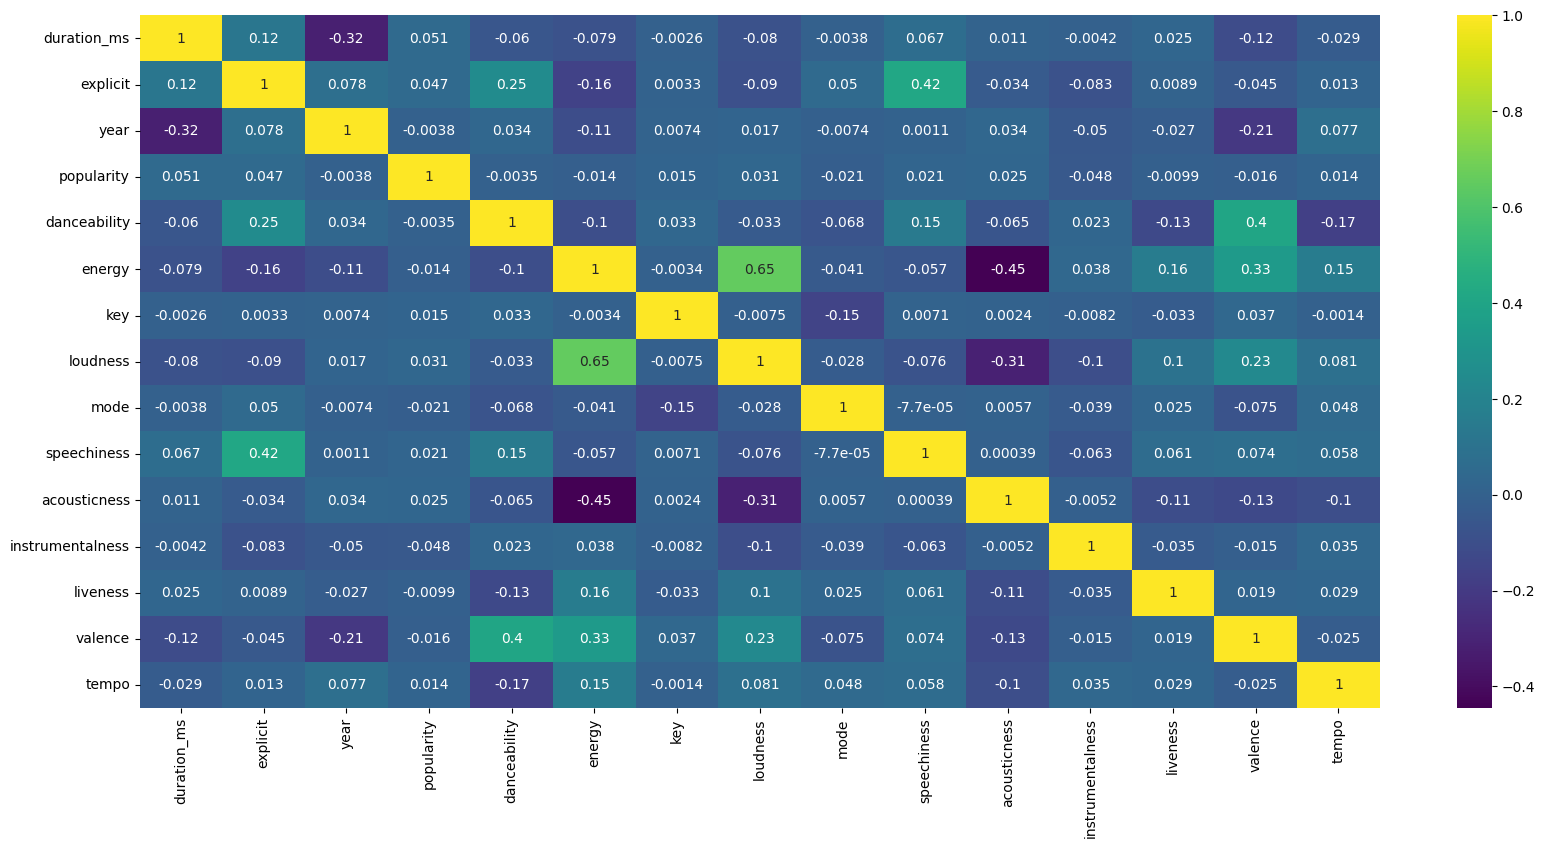

In [ ]:
plt.figure(figsize=(20,9))

sns.heatmap(correlation, annot=True, cmap='viridis')

## PairPlot

It's another useful tool to visualize relation between data, it will print every possible combination of dataseries in the dataset.

The problem is that it's quite big graph and difficult to read, also it takes a lot of resources to make this plot.

In [ ]:
sns.pairplot(df)